## Problem Statement:
Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots

### Association Rules:
  * What goes with what..
  * If(antecedents) -Then(concequents)

# 1.Import Necessary Libraries

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import Data

In [2]:
movie_data=pd.read_csv('my_movies.csv')
movie_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# 3. Data Understanding

In [3]:
movie_data.shape

(10, 15)

## Observation:
    As the movie data is in both text and encoded format , i would like to drop first 5 columns

In [4]:
new_movie_data =movie_data.drop( labels=['V1','V2','V3','V4','V5'],axis=1)
new_movie_data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [5]:
new_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


# 4.Data Preparation

## NOTE:
  * Lift- High Lift value indicates both the items are associates strongly
  * Leverage- A leverage value of 0 indicates independence. Range will be [-1 1]
  * Conviction- A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

### Min_support = 20%

In [6]:
freq_movie_names1=apriori( df=new_movie_data,min_support=0.20,use_colnames=True)
freq_movie_names1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


### confidence = 60%

In [7]:
rules1=association_rules( df=freq_movie_names1,metric='lift',min_threshold=0.6)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [8]:
rules1.sort_values('lift',ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
11,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
14,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
10,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
15,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


<AxesSubplot:xlabel='support', ylabel='confidence'>

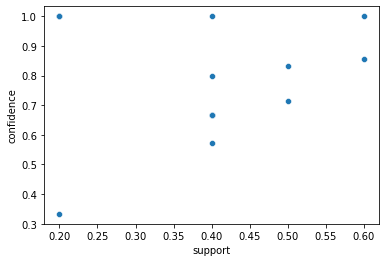

In [9]:
sns.scatterplot( x='support',y='confidence', data= rules1)

### Min_support = 10%

In [10]:
freq_movie_names2 = apriori( df=new_movie_data, min_support=0.10,use_colnames=True)
freq_movie_names2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


### confidence = 70%

In [11]:
rules2 = association_rules(df= freq_movie_names2,metric='lift', min_threshold=0.7)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Sixth Sense, Green Mile, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(LOTR1, Green Mile, LOTR2, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Green Mile),"(LOTR1, Sixth Sense, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [12]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Sixth Sense, Green Mile, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(LOTR1, Green Mile, LOTR2, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Green Mile),"(LOTR1, Sixth Sense, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


### Inference:
   We can observe that out of 250 frequent items we got 236 items with high association becoz of the lift value>1

<AxesSubplot:xlabel='support', ylabel='confidence'>

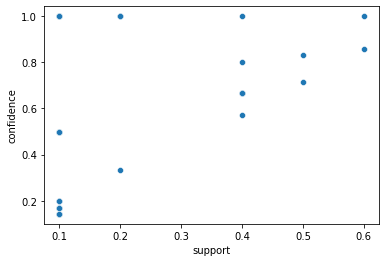

In [13]:
sns.scatterplot(x='support',y='confidence', data= rules2)

### Min_support = 5%

In [14]:
freq_movie_names3 = apriori(df=new_movie_data,min_support=0.05,use_colnames=True)
freq_movie_names3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


### confidence= 90%

In [15]:
rules3 = association_rules(df= freq_movie_names3,metric= 'lift',min_threshold=0.9)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(LOTR1),"(Sixth Sense, Green Mile, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(Sixth Sense),"(LOTR1, Green Mile, LOTR2, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
236,(Green Mile),"(LOTR1, Sixth Sense, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [16]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(LOTR1),"(Sixth Sense, Green Mile, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(Sixth Sense),"(LOTR1, Green Mile, LOTR2, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
236,(Green Mile),"(LOTR1, Sixth Sense, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


## Inference:
   Two observations has been removed because of the lift value<1

<AxesSubplot:xlabel='support', ylabel='confidence'>

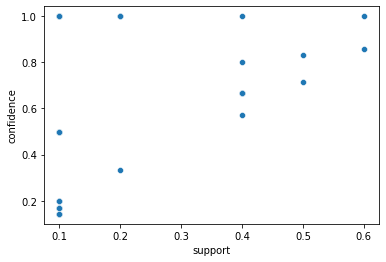

In [17]:
sns.scatterplot(x= 'support', y='confidence',data=rules3)

# THE END!